<a href="https://colab.research.google.com/github/javeriiaaa/nlp-starter/blob/master/Bread_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
file=files.upload()

Saving hedonic.csv to hedonic.csv


**NUMERIC DATA**

In [ ]:
import pandas as pd
from matplotlib import pyplot
import numpy
import seaborn as sns 

In [ ]:
df=pd.read_csv('hedonic.csv', encoding='latin-1')
df = df.drop(df.columns[0], axis=1) 
df

,color of the crumb,air cell shape,air cell structure/ consistency,crumb body,odor,taste & flavor,mouthfeel,particle perception,overall acceptability
0,9,8,9,9,9,9,8,9,9
1,9,7,7,8,7,7,7,7,7
2,5,6,6,6,7,4,4,5,5
3,9,9,9,9,9,9,9,9,9
4,9,8,7,8,7,8,9,8,8
...,...,...,...,...,...,...,...,...,...
60,7,9,9,9,9,9,9,8,8
61,5,8,7,7,5,6,5,5,5
62,4,6,5,6,5,5,3,4,4
63,6,7,6,7,7,8,8,7,7


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

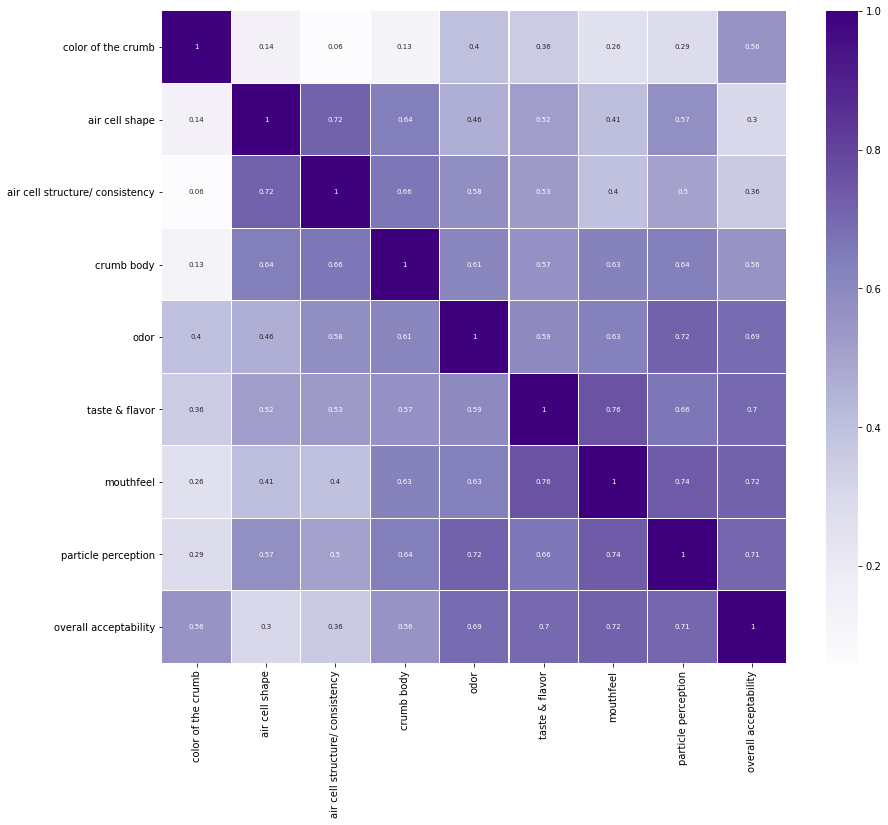

In [ ]:
pyplot.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 7})
pyplot.yticks(rotation=0);
pyplot.savefig('correlation.png')
files.download('correlation.png')

In [ ]:
# above 7 -> Accept, below 7 -> Reject 
df['overall acceptability']=df['overall acceptability'].map({7: "A", 8: "A", 9: "A", 5: "R", 6: "R", 4: "R", 3: "R", 2: "R", 1: "R"})
df

,color of the crumb,air cell shape,air cell structure/ consistency,crumb body,odor,taste & flavor,mouthfeel,particle perception,overall acceptability
0,9,8,9,9,9,9,8,9,A
1,9,7,7,8,7,7,7,7,A
2,5,6,6,6,7,4,4,5,R
3,9,9,9,9,9,9,9,9,A
4,9,8,7,8,7,8,9,8,A
...,...,...,...,...,...,...,...,...,...
60,7,9,9,9,9,9,9,8,A
61,5,8,7,7,5,6,5,5,R
62,4,6,5,6,5,5,3,4,R
63,6,7,6,7,7,8,8,7,A


In [ ]:
df=pd.get_dummies(df)
df

,color of the crumb,air cell shape,air cell structure/ consistency,crumb body,odor,taste & flavor,mouthfeel,particle perception,overall acceptability_A,overall acceptability_R
0,9,8,9,9,9,9,8,9,1,0
1,9,7,7,8,7,7,7,7,1,0
2,5,6,6,6,7,4,4,5,0,1
3,9,9,9,9,9,9,9,9,1,0
4,9,8,7,8,7,8,9,8,1,0
...,...,...,...,...,...,...,...,...,...,...
60,7,9,9,9,9,9,9,8,1,0
61,5,8,7,7,5,6,5,5,0,1
62,4,6,5,6,5,5,3,4,0,1
63,6,7,6,7,7,8,8,7,1,0


In [ ]:

df = df.rename(columns={'overall acceptability_A': 'A', 'overall acceptability_R': 'R'})
df
labels = ['A', 'R']
features = [a  for a in df.columns if a not in labels ]
features
y = df[labels[0]]
x= df[features]
features

['color of the crumb',
 'air cell shape',
 'air cell structure/ consistency',
 'crumb body',
 'odor',
 'taste & flavor',
 'mouthfeel',
 'particle perception']

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
# taken from mushroom dataset example. TSNE = t-distributed stochastic neighbor embedding
# TSNE converts similarities between data points to joint probabilities // plots each instance based on combined probablity of its features 
model = TSNE(learning_rate = 100)

In [ ]:
transformed = model.fit_transform(x.values)
xs = transformed[:,0]
xs

array([-2.8351874 , -0.37292272,  4.1452193 , -2.9543352 , -1.8116117 ,
       -1.6691933 ,  0.23297632, -1.5243328 , -1.474791  , -0.7289662 ,
        2.360364  ,  2.9647107 , -1.1129776 , -2.3736808 ,  1.702624  ,
        2.2849784 , -2.7395132 , -1.720587  ,  0.27476165,  1.6037084 ,
        4.975616  , -2.8595195 ,  2.2417438 ,  4.164655  ,  3.7832847 ,
       -1.8194932 ,  5.166863  ,  2.134159  ,  2.6245437 ,  0.8017208 ,
       -2.2480354 ,  2.8681834 ,  0.3515328 ,  4.5602    , -1.1766137 ,
        3.3053777 ,  4.0749693 ,  1.5797803 , -1.2373621 ,  5.2384043 ,
        2.1333616 ,  1.2161518 ,  1.5612683 , -1.2371545 ,  2.6450927 ,
        1.7284688 ,  5.0108595 , -2.106137  ,  2.7145808 ,  2.548205  ,
        0.6725131 , -1.073583  ,  5.0500503 ,  2.8229723 , -0.38645336,
        1.8346095 ,  1.1656188 ,  3.7847452 ,  1.389426  ,  5.07179   ,
       -2.6953566 ,  3.6003351 ,  4.4951115 ,  0.25513172,  0.62730354],
      dtype=float32)

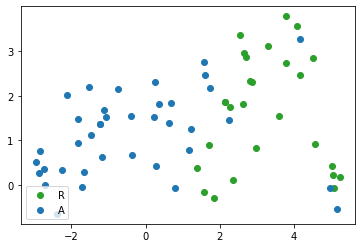

In [ ]:
ys = transformed[:,1]
df_trans = pd.DataFrame({'xs':xs, 'ys':ys})
pyplot.scatter(df_trans.loc[y==0]['xs'], df_trans.loc[y ==0]['ys'], c= 'tab:green')
pyplot.scatter(df_trans.loc[y ==1]['xs'], df_trans.loc[y ==1]['ys'], c= 'tab:blue')
pyplot.legend(loc ='lower left', labels = ['R', 'A'])

pyplot.show()

In [ ]:
from sklearn.linear_model import Lasso

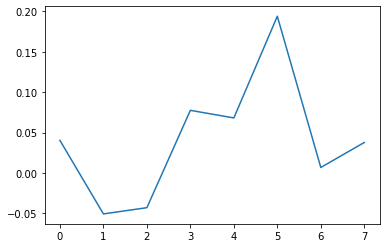

0.6144455137348658
  (0, 0)	0.04044160351107984
  (0, 1)	-0.05051604370133599
  (0, 2)	-0.04280566256693048
  (0, 3)	0.0775992706359172
  (0, 4)	0.06820043413354755
  (0, 5)	0.19398183457197934
  (0, 6)	0.00692252049827709
  (0, 7)	0.037853649663090176


In [ ]:
lasso = Lasso(alpha = 0.001)
lasso_coef = lasso.fit(x,y).coef_
_=pyplot.plot(range(len(x.columns)), lasso_coef)
pyplot.show()
# odor_n is the property with highest separation or gini rate 
score=lasso.score(x, y, sample_weight=None)
print(score)
coeffs = lasso.sparse_coef_
print(coeffs)

In [ ]:
x.columns[5]

'taste & flavor'

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import export_graphviz

In [ ]:
tree = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size = 0.3, random_state = 42)
tree.fit(X_train, y_train)
y_pred=tree.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 3  1]
 [ 0 16]]
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.94      1.00      0.97        16

    accuracy                           0.95        20
   macro avg       0.97      0.88      0.91        20
weighted avg       0.95      0.95      0.95        20



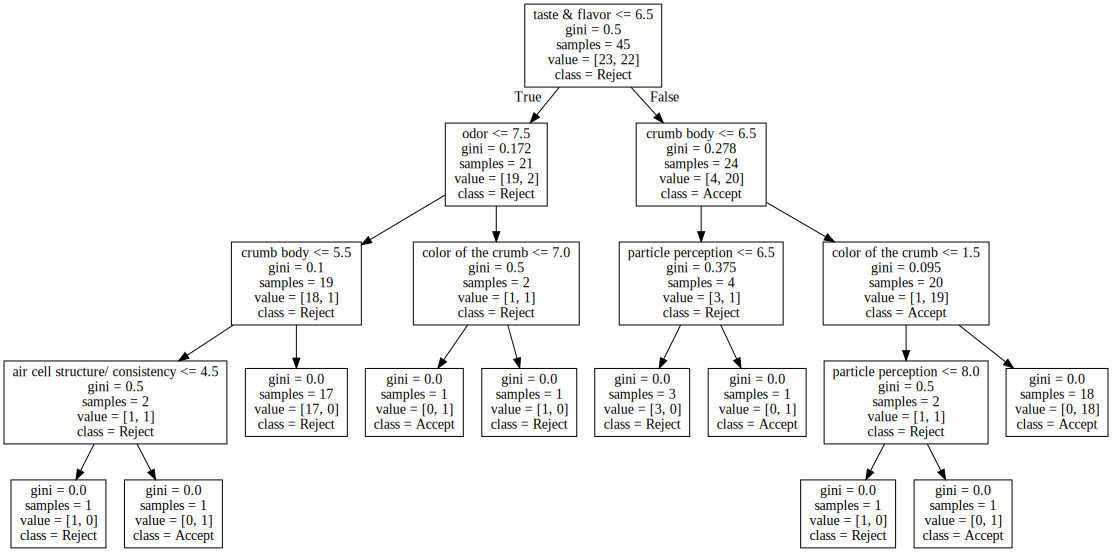

In [ ]:
import graphviz
dot_data =export_graphviz(tree, out_file = None, feature_names =x.columns, class_names = ['Reject', 'Accept'])
graph = graphviz.Source(dot_data)
graph


In [ ]:
from google.colab import files
file=files.upload()

Saving descriptive.csv to descriptive.csv


**CATEGORICAL DATA**

In [ ]:
df_=pd.read_csv('descriptive.csv', encoding='latin-1')
df_ = df_.drop(df_.columns[0], axis=1) 
df_

,color of the crumb,air cell shape,air cell structure/ consistency,crumb body,odor,taste & flavor,mouthfeel,particle perception
0,Yellow,round,thin cell walled,firm,grainy,sour,soft & moist,no aftertaste
1,bright,round,non- uniform,weak,grainy,yeasty flavor,coarse,no aftertaste
2,bright,round,thin cell walled,firm,flour like,foreign flavors like flour or cereal flavors,easily chewable,no after taste
3,bright,round,thin cell walled,firm,yeasty odor,yeasty flavor,soft & moist,no after taste
4,bright,round,thick cell walled,firm,yeasty odor,yeasty flavor,soft & moist,no after taste
...,...,...,...,...,...,...,...,...
60,dull,fine,non- uniform,firm,flour like,yeasty flavor,dry,no aftertaste
61,dull,fine,non- uniform,firm,yeasty odor,yeasty flavor,gummy,no aftertaste
62,grey,fine,thick cell walled,firm,yeasty odor,foreign flavors like flour or cereal flavors,dry,powdery mouthfeel
63,grey,elongated,large holes,firm,flour like,yeasty flavor,soft & moist,powdery mouthfeel


In [ ]:
df_=pd.get_dummies(df_)
df_

,color of the crumb_Bright,color of the crumb_Yellow,color of the crumb_bright,color of the crumb_dull,color of the crumb_grey,color of the crumb_streaked,air cell shape_elongated,air cell shape_fine,air cell shape_round,air cell structure/ consistency_large holes,air cell structure/ consistency_non- uniform,air cell structure/ consistency_open,air cell structure/ consistency_thick cell walled,air cell structure/ consistency_thin cell walled,crumb body_firm,crumb body_overly firm,crumb body_weak,odor_flour like,odor_grainy,odor_sour,odor_yeasty odor,taste & flavor_bitter,taste & flavor_foreign flavors like flour or cereal flavors,taste & flavor_salty,taste & flavor_sour,taste & flavor_sweet,taste & flavor_yeasty flavor,mouthfeel_coarse,mouthfeel_dry,mouthfeel_dry,mouthfeel_easily chewable,mouthfeel_gummy,mouthfeel_soft & moist,particle perception_no after taste,particle perception_no aftertaste,particle perception_no aftyrtaste,particle perception_powdery mouthfeel
0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0
4,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
61,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
62,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
63,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1


In [ ]:
# df__=pd.concat([df['A'], df_], axis=1)
df_['A']=df['A']
df_['R']=df['R']
df_

,color of the crumb_Bright,color of the crumb_Yellow,color of the crumb_bright,color of the crumb_dull,color of the crumb_grey,color of the crumb_streaked,air cell shape_elongated,air cell shape_fine,air cell shape_round,air cell structure/ consistency_large holes,air cell structure/ consistency_non- uniform,air cell structure/ consistency_open,air cell structure/ consistency_thick cell walled,air cell structure/ consistency_thin cell walled,crumb body_firm,crumb body_overly firm,crumb body_weak,odor_flour like,odor_grainy,odor_sour,odor_yeasty odor,taste & flavor_bitter,taste & flavor_foreign flavors like flour or cereal flavors,taste & flavor_salty,taste & flavor_sour,taste & flavor_sweet,taste & flavor_yeasty flavor,mouthfeel_coarse,mouthfeel_dry,mouthfeel_dry,mouthfeel_easily chewable,mouthfeel_gummy,mouthfeel_soft & moist,particle perception_no after taste,particle perception_no aftertaste,particle perception_no aftyrtaste,particle perception_powdery mouthfeel,A,R
0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0
1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0
2,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
3,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0
4,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0
61,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
62,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
63,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0


In [ ]:
labels = ['A', 'R']
features = [a  for a in df_.columns if a not in labels ]
features
y2 = df_[labels[0]]
x2= df_[features]
features

['color of the crumb_Bright',
 'color of the crumb_Yellow',
 'color of the crumb_bright',
 'color of the crumb_dull',
 'color of the crumb_grey',
 'color of the crumb_streaked',
 'air cell shape_elongated',
 'air cell shape_fine',
 'air cell shape_round',
 'air cell structure/ consistency_large holes',
 'air cell structure/ consistency_non- uniform',
 'air cell structure/ consistency_open',
 'air cell structure/ consistency_thick cell walled',
 'air cell structure/ consistency_thin cell walled',
 'crumb body_firm',
 'crumb body_overly firm',
 'crumb body_weak',
 'odor_flour like',
 'odor_grainy',
 'odor_sour',
 'odor_yeasty odor',
 'taste & flavor_bitter',
 'taste & flavor_foreign flavors like flour or cereal flavors',
 'taste & flavor_salty',
 'taste & flavor_sour',
 'taste & flavor_sweet',
 'taste & flavor_yeasty flavor',
 'mouthfeel_coarse',
 'mouthfeel_dry',
 'mouthfeel_dry ',
 'mouthfeel_easily chewable',
 'mouthfeel_gummy',
 'mouthfeel_soft & moist',
 'particle perception_no afte

In [ ]:
model2 = TSNE(learning_rate = 100)

In [ ]:
transformed2 = model2.fit_transform(x2.values)
xs2 = transformed2[:,0]
xs2

array([ 0.10282019, -0.189778  ,  1.0994242 ,  1.396472  ,  1.3511021 ,
        1.1265973 ,  2.189237  ,  2.4443078 ,  1.240103  ,  5.7671723 ,
       -1.372625  , -1.4148041 ,  2.9360592 , -1.1158632 , -1.001892  ,
        1.0798781 ,  0.72804904,  1.6764448 ,  6.098304  ,  4.6959453 ,
        2.319451  ,  1.8572958 ,  2.027169  ,  1.6144396 , -0.03562817,
        3.3073132 ,  0.10451622, -1.2491152 ,  0.8888807 ,  3.5096807 ,
        3.0988533 ,  5.688584  ,  4.0220823 ,  2.8369555 ,  1.2726897 ,
        3.2549212 ,  5.7293224 ,  4.7659497 ,  4.481077  ,  4.399312  ,
       -1.709126  ,  2.115176  ,  2.1793702 ,  4.494203  ,  5.6885834 ,
        5.689065  ,  3.9572234 , -0.11615949,  5.13678   , -1.4884778 ,
        3.8257823 ,  4.4790263 ,  4.0286775 , -1.1472867 ,  1.7621061 ,
        2.0348015 ,  2.084784  ,  5.8753486 ,  5.7050276 ,  2.521333  ,
        4.5311136 ,  5.1369715 ,  3.435494  ,  3.063375  ,  4.4073877 ],
      dtype=float32)

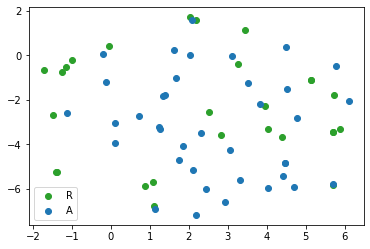

In [ ]:
# transformed2 = model2.fit_transform(x.values)
xs2 = transformed2[:,0]
ys2 = transformed2[:,1]
df_trans2 = pd.DataFrame({'xs':xs2, 'ys':ys2})
pyplot.scatter(df_trans2.loc[y2==0]['xs'], df_trans2.loc[y2 ==0]['ys'], c= 'tab:green')
pyplot.scatter(df_trans2.loc[y2 ==1]['xs'], df_trans2.loc[y2 ==1]['ys'], c= 'tab:blue')
pyplot.legend(loc ='lower left', labels = ['R', 'A'])

pyplot.show()

In [ ]:
from sklearn.linear_model import Lasso

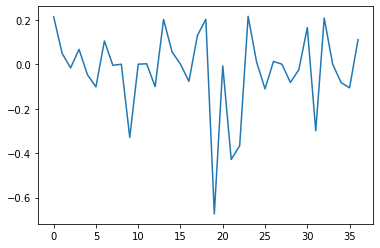

0.5820449936228875
  (0, 0)	0.21303710803286272
  (0, 1)	0.0492485063479116
  (0, 2)	-0.0167840302884522
  (0, 3)	0.06692547424622443
  (0, 4)	-0.04772441405081413
  (0, 5)	-0.10198395370188339
  (0, 6)	0.10472716865945059
  (0, 7)	-0.004962602634755086
  (0, 9)	-0.3296280049846801
  (0, 11)	0.0019821667890488905
  (0, 12)	-0.10094060855439979
  (0, 13)	0.20140153737051888
  (0, 14)	0.05581412882320179
  (0, 16)	-0.07722902851714436
  (0, 17)	0.12909779973809624
  (0, 18)	0.2019615170347275
  (0, 19)	-0.6735618475328693
  (0, 20)	-0.007308779399937783
  (0, 21)	-0.42870804516519695
  (0, 22)	-0.3666461556365659
  (0, 23)	0.21585238599377313
  (0, 24)	0.010016487514679014
  (0, 25)	-0.11096203618896884
  (0, 26)	0.012754316640927322
  (0, 28)	-0.08204581517392637
  (0, 29)	-0.024751130582847534
  (0, 30)	0.16472503066779534
  (0, 31)	-0.2993626738729206
  (0, 32)	0.20793093317457426
  (0, 34)	-0.0827218534444109
  (0, 35)	-0.10605037902135132
  (0, 36)	0.11057957812271396


In [ ]:
lasso = Lasso(alpha = 0.001)
lasso_coef = lasso.fit(x2,y2).coef_
_=pyplot.plot(range(len(x2.columns)), lasso_coef)
pyplot.show()
# odor_n is the property with highest separation or gini rate 
score=lasso.score(x2, y2, sample_weight=None)
print(score)
coeffs = lasso.sparse_coef_
print(coeffs)

In [ ]:
x2.columns[23]

'taste & flavor_salty'

In [ ]:
tree2 = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(x2, y2, train_size=0.7, test_size = 0.3, random_state = 42)
tree2.fit(X_train, y_train)
y_pred=tree2.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 3  1]
 [ 5 11]]
              precision    recall  f1-score   support

           0       0.38      0.75      0.50         4
           1       0.92      0.69      0.79        16

    accuracy                           0.70        20
   macro avg       0.65      0.72      0.64        20
weighted avg       0.81      0.70      0.73        20



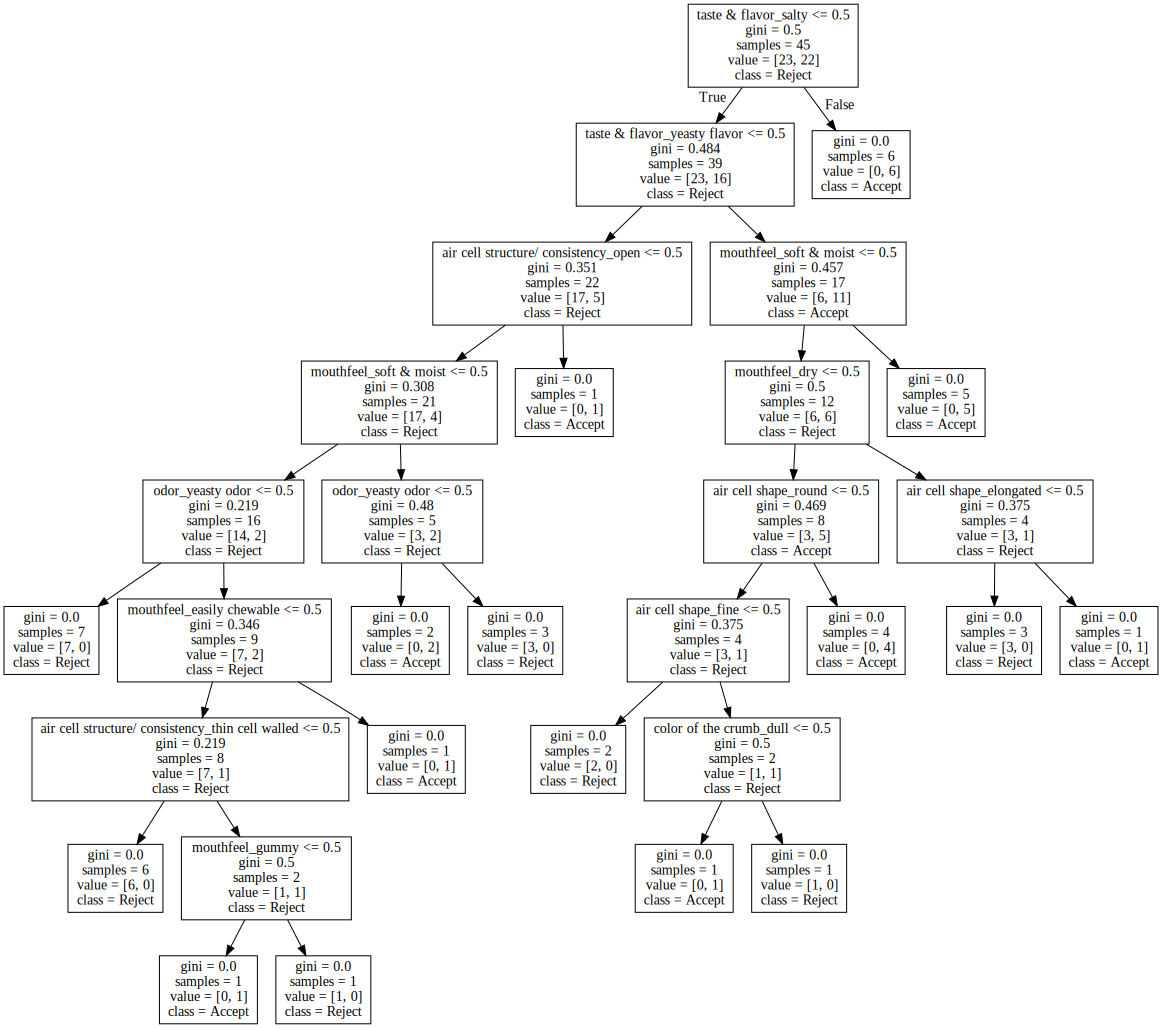

In [ ]:
dot_data2 =export_graphviz(tree2, out_file = None, feature_names =x2.columns, class_names = ['Reject', 'Accept'])
graph2 = graphviz.Source(dot_data2)
graph2
